In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv('raw3')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
sum(data.isnull().sum())

0

# Feature Engineering

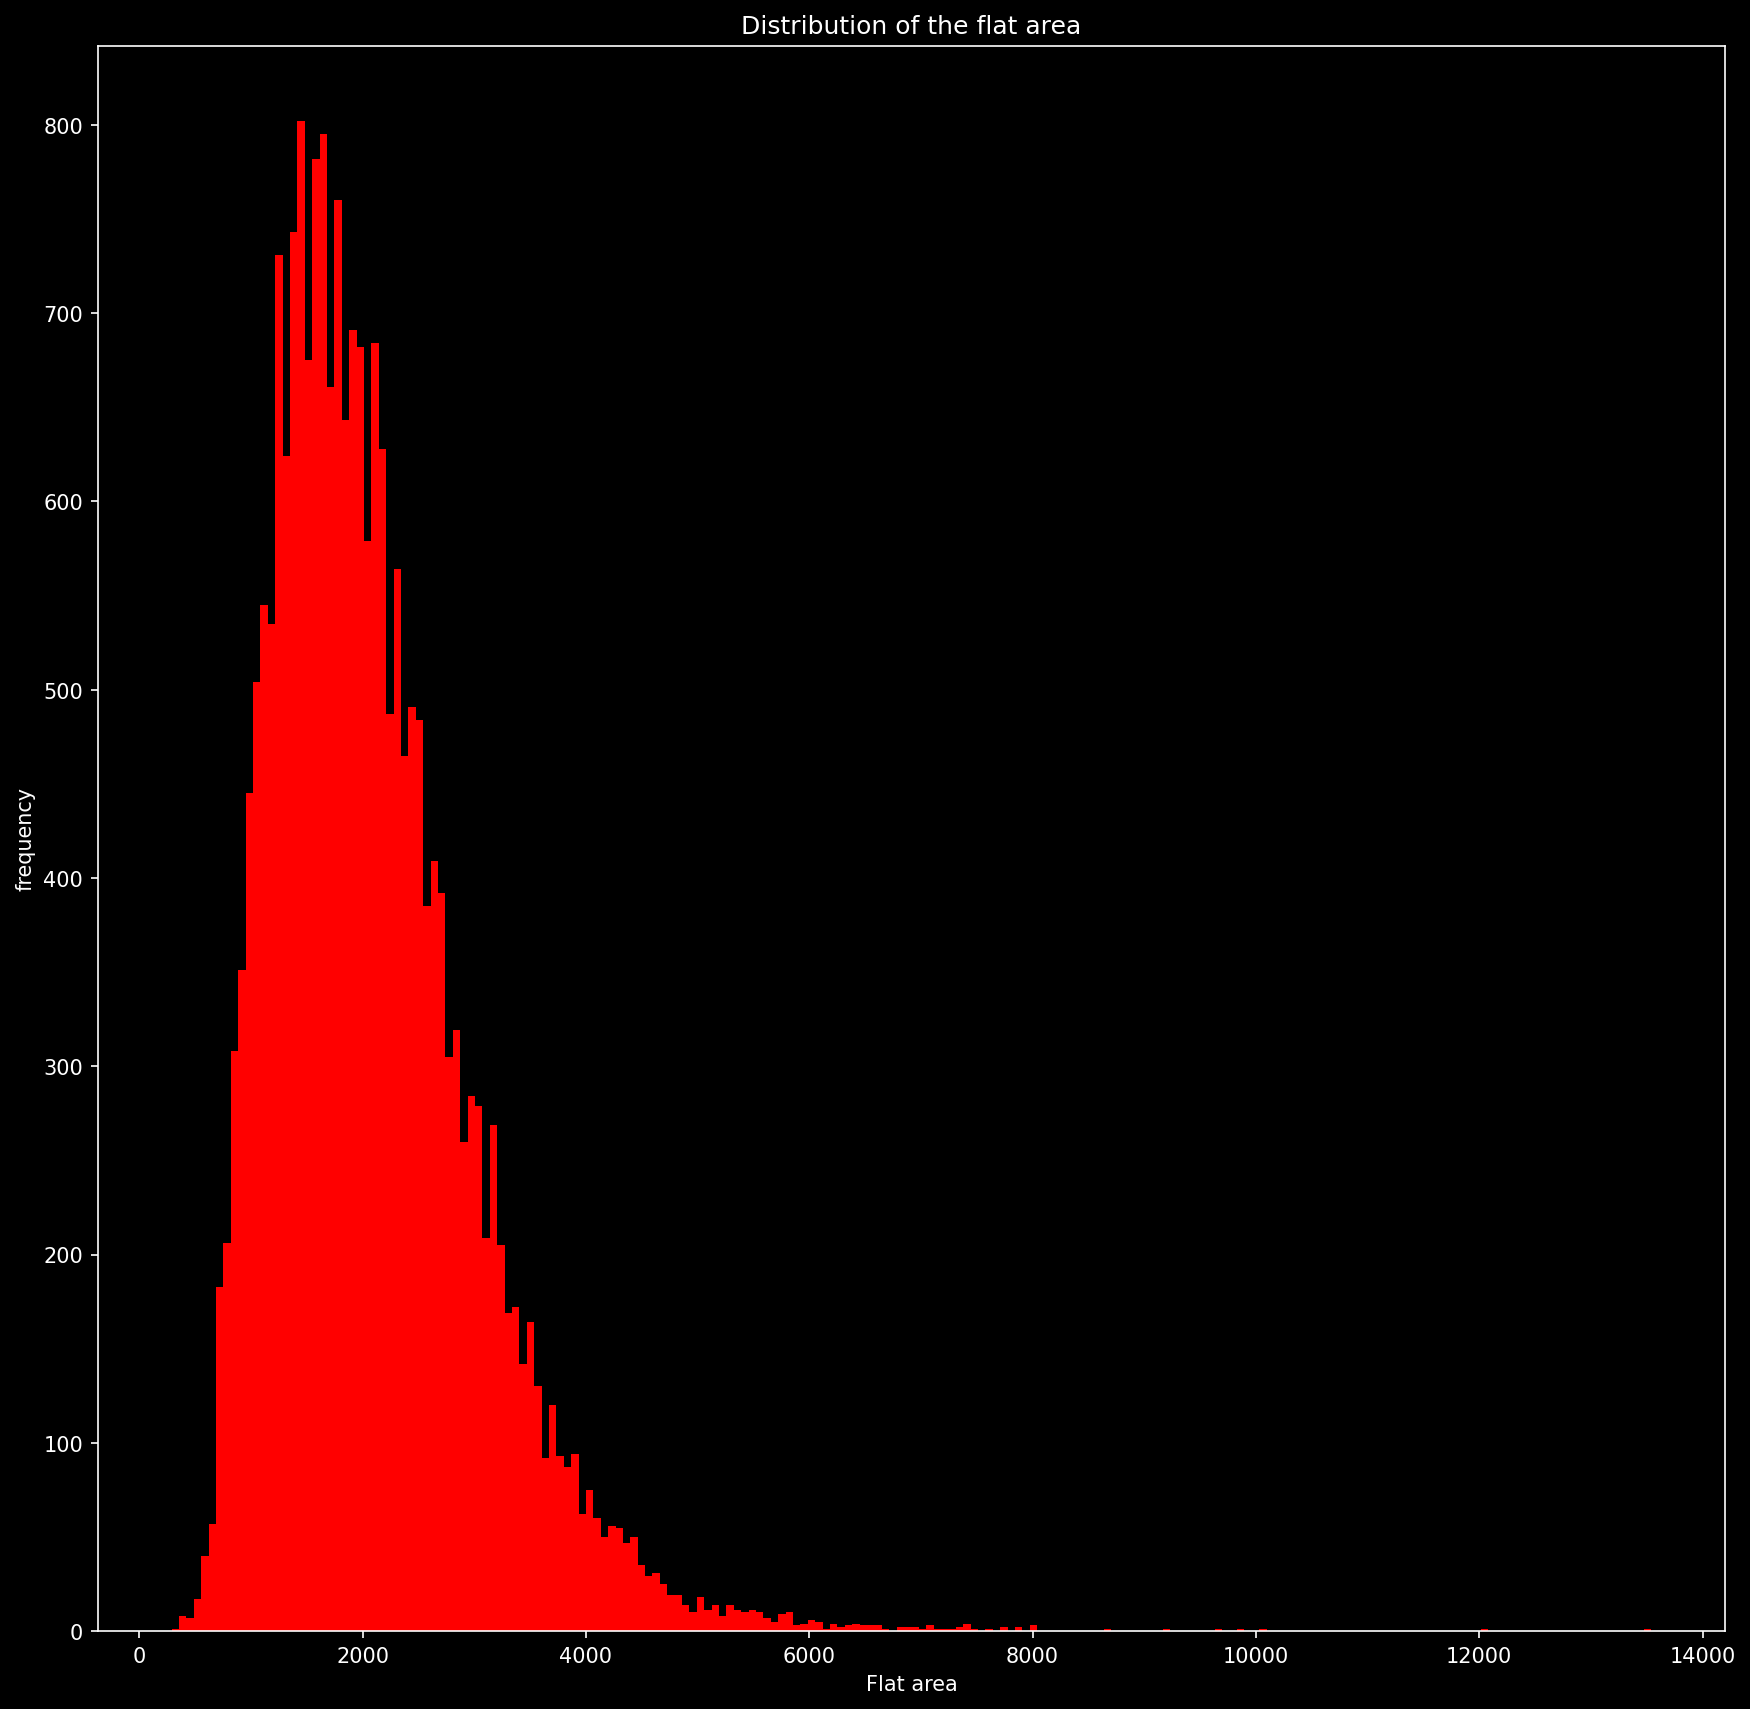

In [4]:
plt.figure(dpi = 150, figsize = (14, 14))
plt.hist(data['Flat Area (in Sqft)'], color = 'red', bins = 200)
plt.xlabel('Flat area')
plt.ylabel('frequency')
plt.title('Distribution of the flat area')
#plt.legend()
plt.show()

In [5]:
def log_transform(sample_data):
    return np.log(sample_data)

In [6]:
data['transforn_flat_area'] = data['Flat Area (in Sqft)'].map(log_transform)

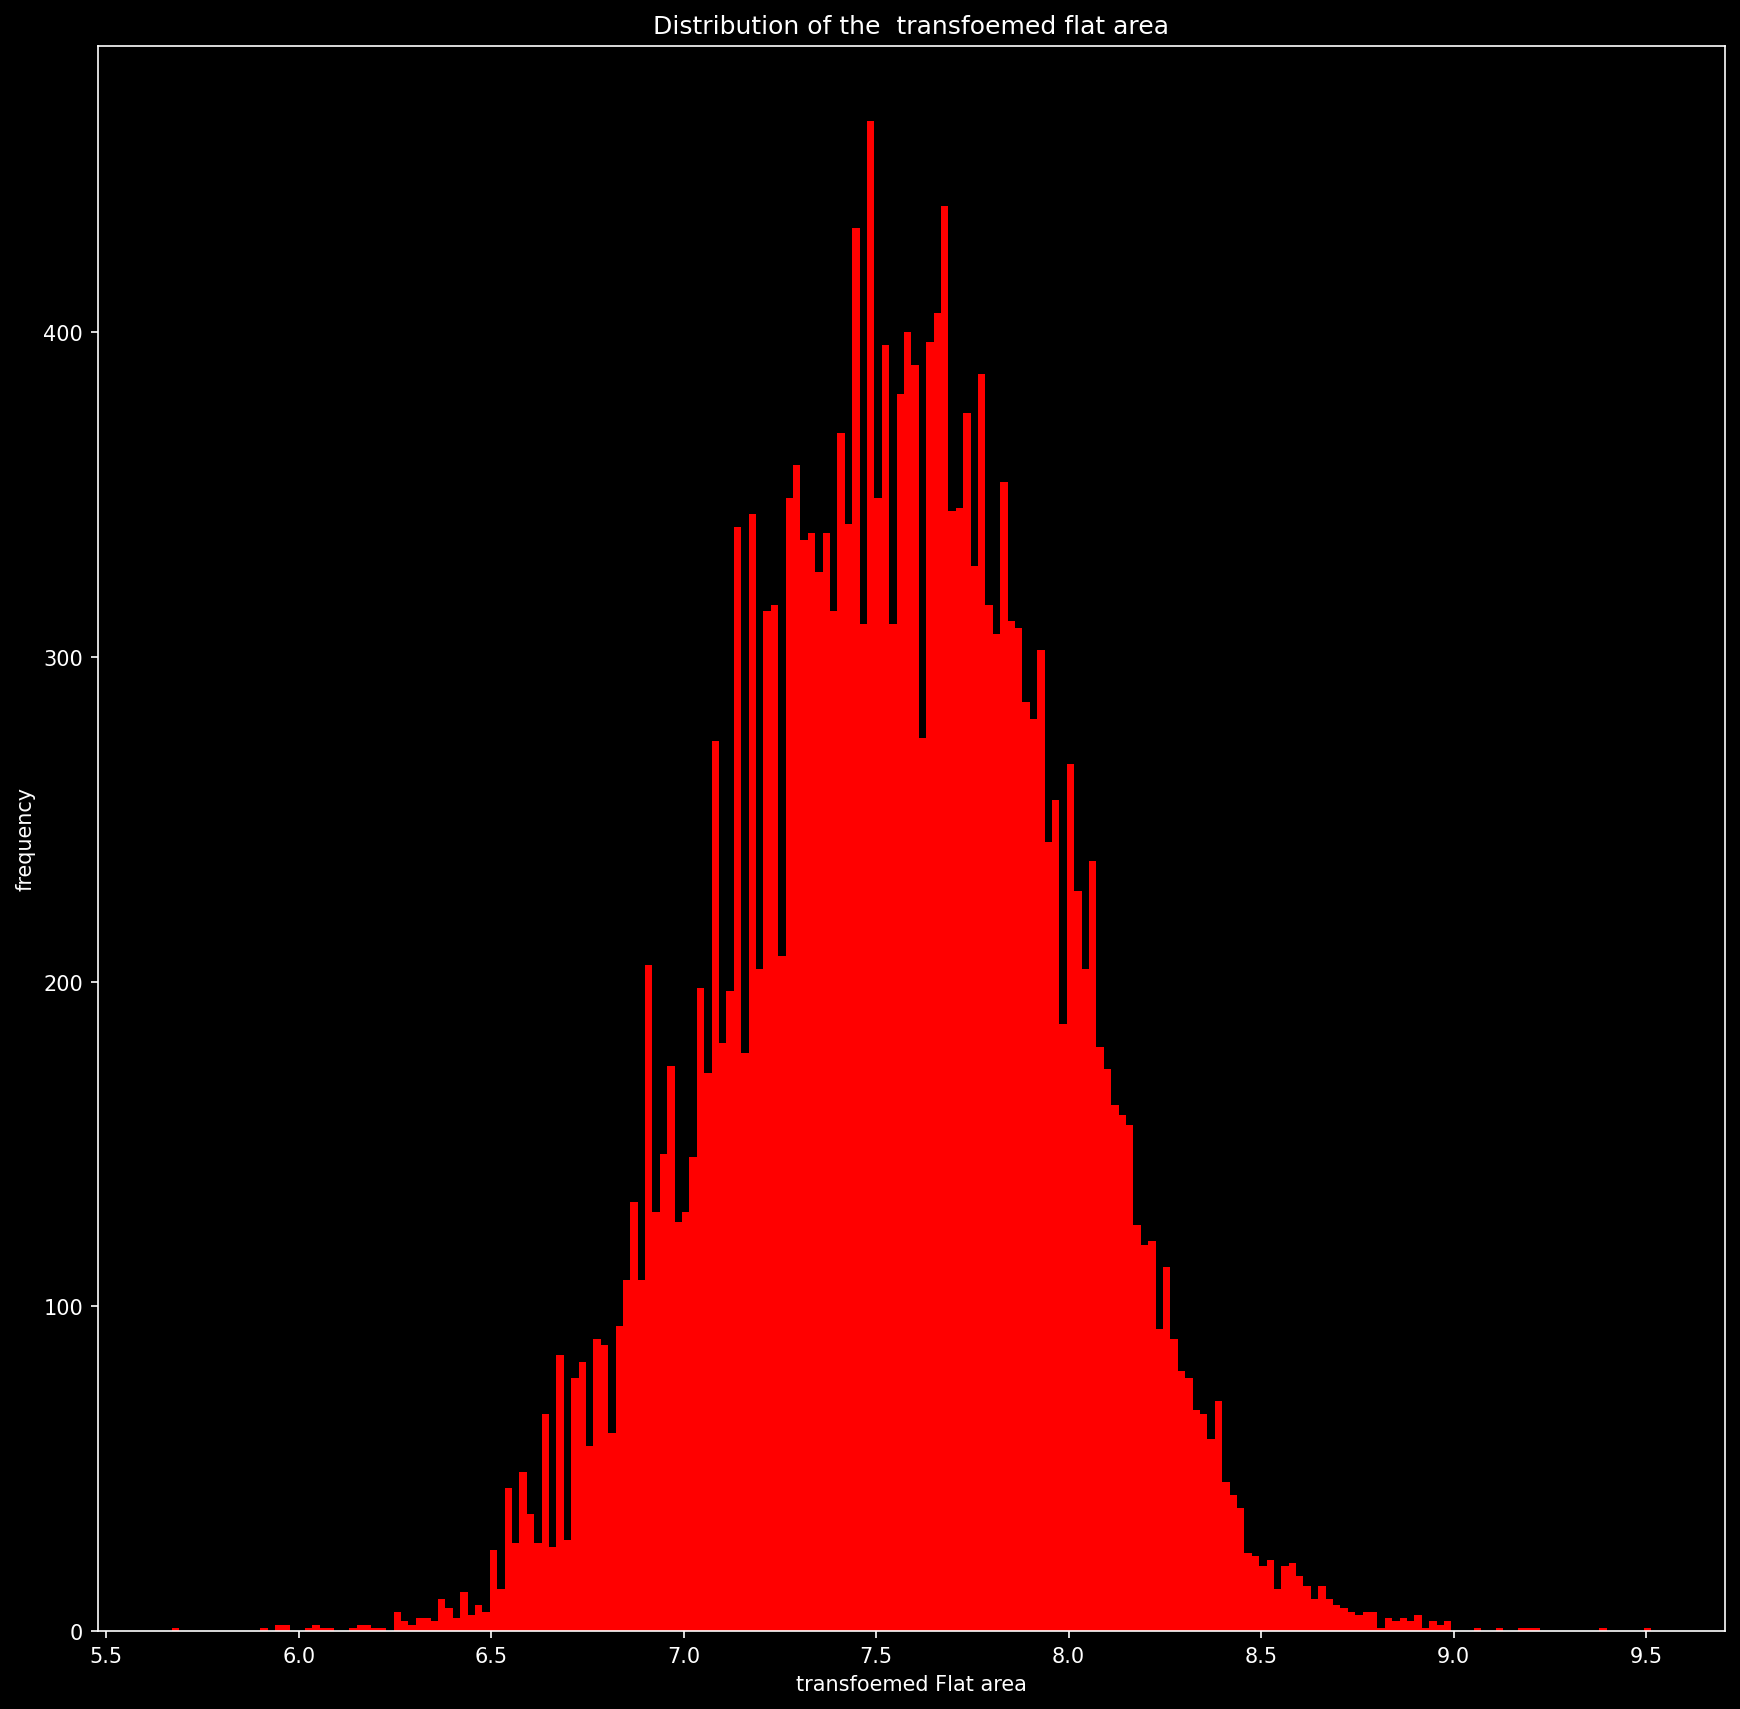

In [7]:
plt.figure(dpi = 150, figsize = (14, 14))
plt.hist(data['transforn_flat_area'], color = 'red', bins = 200)
plt.xlabel('transfoemed Flat area')
plt.ylabel('frequency')
plt.title('Distribution of the  transfoemed flat area')
#plt.legend()
plt.show()

In [8]:
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),transforn_flat_area
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,7.073270
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,7.851661
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,6.646391
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,7.580700
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,7.426549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,7.333023
21605,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,7.745003
21606,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,6.927558
21607,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,7.377759


In [9]:
label_encoded = data['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [10]:
label_encoded = label_encoded.map({'Bad': 1, 'Okay': 2, 'Fair': 3, 'Good': 4, 'Excellent': 5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

In [11]:
mean = []

for i  in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

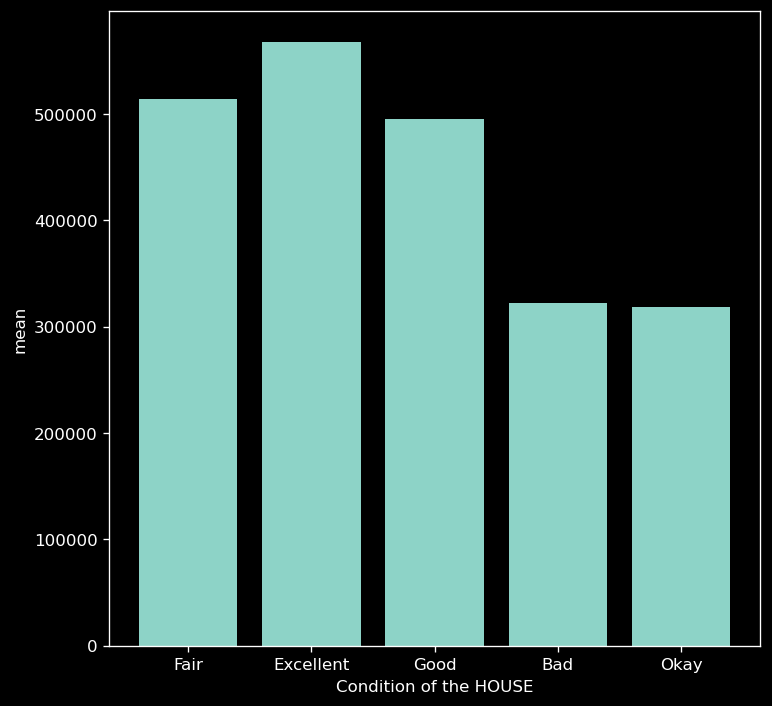

In [12]:
plt.figure(dpi = 120 , figsize = (7,7))
plt.bar(data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the HOUSE')
plt.ylabel('mean')
plt.show()

In [13]:
mapping = {'Bad': 'Okay',
            'Okay': 'Okay',
            'Good': 'Good',
            'Fair': 'Good',
            'Excellent': "Excellent"}
data['Condition of the House'] = data['Condition of the House'].map(mapping)


In [14]:
mean = []

for i  in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

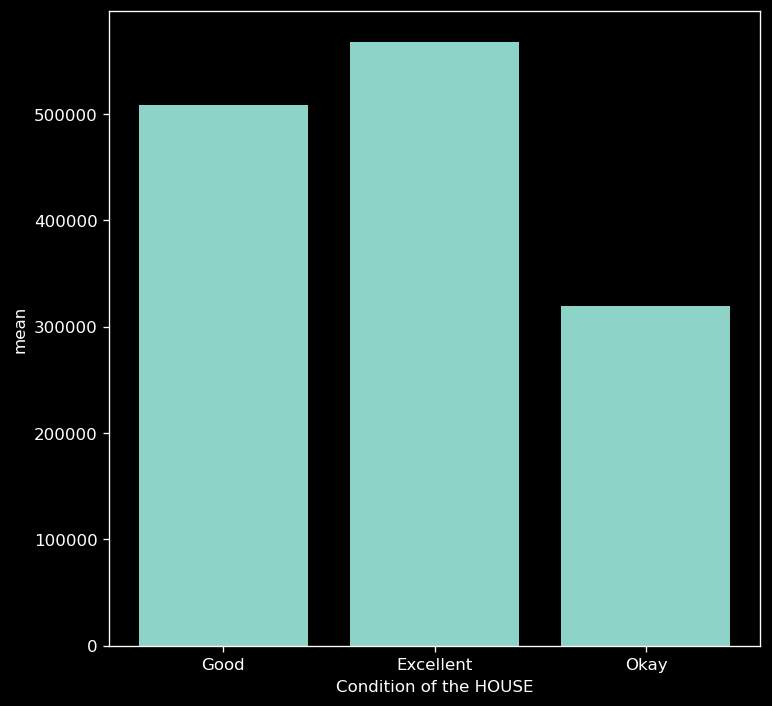

In [15]:
plt.figure(dpi = 120 , figsize = (7,7))
plt.bar(data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the HOUSE')
plt.ylabel('mean')
plt.show()

In [16]:
# BINNING OF THE continuous variable
len(data['Age of House (in Years)'].unique())

116

In [17]:
data['Age of House (in Years)'].max()

118

In [18]:
data['Age of House (in Years)'].min()

3

In [19]:
def age_of_house(x):
    if x < 10:
        x = 'new'
    elif x < 50:
        x = 'old'
    else:
        x = 'very old'
    return x

In [20]:
#data['Age of House (in Years)'] 
cat_age_house = data['Age of House (in Years)'].map(age_of_house)
cat_age_house.unique()

array(['very old', 'old', 'new'], dtype=object)